In [15]:
import pandas as pd
data = pd.read_csv('churn_data.csv')
data.head()

,Customer_id,Children,Age,Income,Marital,Gender,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn
0,K409198,0,68,28562,Widowed,Male,Credit Card (automatic),7,172,905,No
1,S120509,1,27,21705,Married,Female,Bank Transfer(automatic),1,243,801,Yes
2,K191035,4,50,9610,Widowed,Female,Credit Card (automatic),16,160,2055,No
3,D90850,1,48,18925,Married,Male,Mailed Check,17,120,2165,No
4,K662701,0,83,40074,Separated,Male,Mailed Check,2,150,271,Yes


In [16]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Customer_id', 'Marital', 'Gender', 'PaymentMethod', 'Churn']

In [17]:
# check missing values in categorical variables
data[categorical].isnull().sum()

Customer_id      0
Marital          0
Gender           0
PaymentMethod    0
Churn            0
dtype: int64

In [18]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [19]:
# check missing values in numerical variables
data[numerical].isnull().sum()

Children             0
Age                  0
Income               0
Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64

In [20]:
# drop the original Customer_id variable
data.drop('Customer_id', axis=1, inplace = True)

In [24]:
## Encode categorical variables
dummy_coded_data = pd.concat([data[numerical], data['Churn'],                   
                     pd.get_dummies(data.Marital,drop_first=True),
                     pd.get_dummies(data.Gender,drop_first=True),
                     pd.get_dummies(data.PaymentMethod,drop_first=True)], axis=1)
dummy_coded_data.head()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn,Married,Never Married,Separated,Widowed,Male,Credit Card (automatic),Electronic Check,Mailed Check
0,0,68,28562,7,172,905,No,0,0,0,1,1,1,0,0
1,1,27,21705,1,243,801,Yes,1,0,0,0,0,0,0,0
2,4,50,9610,16,160,2055,No,0,0,0,1,0,1,0,0
3,1,48,18925,17,120,2165,No,1,0,0,0,1,0,0,1
4,0,83,40074,2,150,271,Yes,0,0,1,0,1,0,0,1


In [25]:
X = dummy_coded_data.drop(['Churn'], axis=1)
y = dummy_coded_data['Churn']

In [26]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
test_df = pd.concat ([X_test,y_test],axis =1 )
train_df = pd.concat ([X_train,y_train],axis =1 )
total_data = pd.concat ([train_df,test_df],axis =0 )
pd.DataFrame(total_data)
total_data.head()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year,Married,Never Married,Separated,Widowed,Male,Credit Card (automatic),Electronic Check,Mailed Check,Churn
7389,1,83,3946,67,223,6450,0,1,0,0,1,1,0,0,No
9275,2,76,51864,56,208,5006,0,1,0,0,0,0,0,1,No
2995,1,38,8462,11,220,1934,0,0,0,0,1,1,0,0,Yes
5316,7,38,15693,71,188,6497,0,0,1,0,0,0,0,1,No
356,0,54,23957,5,182,764,0,0,1,0,1,0,0,1,Yes


In [27]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# probability of getting output as 'No'
logreg.predict_proba(X_test)[:,0]

array([0.97537475, 0.41192884, 0.26964416, ..., 0.99024645, 0.71252499,
       0.92104976])

In [30]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8025


In [32]:
# train accuracy
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8065


In [34]:
# Print Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1272  214]
 [ 181  333]]


In [35]:
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  1272

True Negatives(TN) =  333

False Positives(FP) =  214

False Negatives(FN) =  181


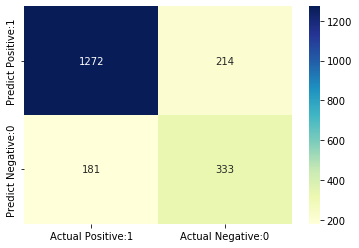

In [36]:
# visualize confusion matrix with seaborn heatmap

import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.88      0.86      0.87      1486
         Yes       0.61      0.65      0.63       514

    accuracy                           0.80      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.81      0.80      0.80      2000



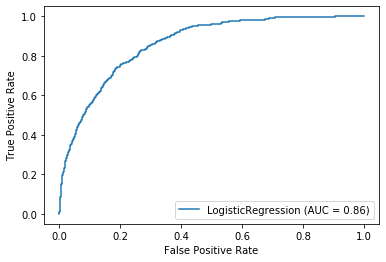

In [42]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

In [51]:
# total_data
total_data_no_response = total_data.drop(['Churn'],axis = 1)
total_data_no_response.head()
pred_churn = logreg.predict(total_data_no_response)
total_data['predicted_churn'] = pred_churn
total_data.head()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year,Married,Never Married,Separated,Widowed,Male,Credit Card (automatic),Electronic Check,Mailed Check,Churn,predicted_churn
7389,1,83,3946,67,223,6450,0,1,0,0,1,1,0,0,No,No
9275,2,76,51864,56,208,5006,0,1,0,0,0,0,0,1,No,No
2995,1,38,8462,11,220,1934,0,0,0,0,1,1,0,0,Yes,Yes
5316,7,38,15693,71,188,6497,0,0,1,0,0,0,0,1,No,No
356,0,54,23957,5,182,764,0,0,1,0,1,0,0,1,Yes,Yes


In [ ]:
from google.colab import files
total_data.to_csv('churn_prediction.csv') 
files.download('churn_prediction.csv')